In [12]:
# author: Asmaa ~ 2019
# ----------------------

#import libraries
import os
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


# Data Preparation

### Downloading Data

In [2]:
# download data
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-08-09 13:43:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   211MB/s    in 0.3s    

2019-08-09 13:43:58 (211 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# extract data
local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
# assign directories to variables
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Getting Info About Data

In [5]:
# get info about data
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [0]:
# file names
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

### Data Visualization

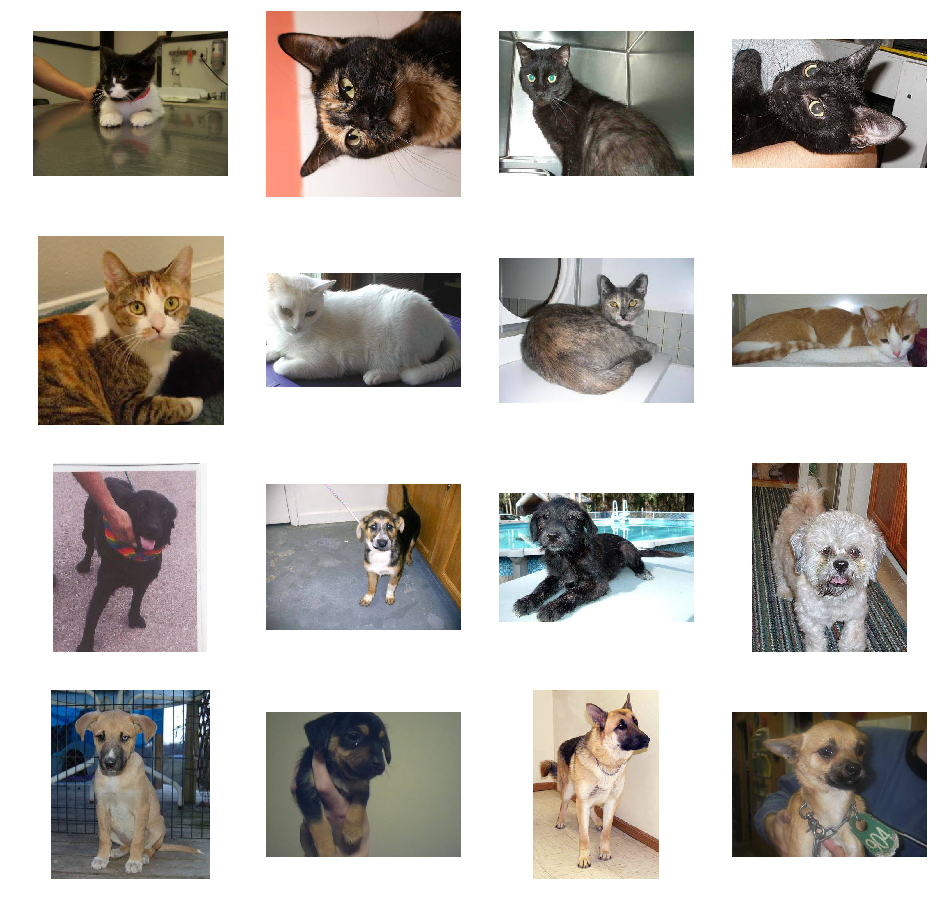

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(4*4, 4*4)
pic_index = 0 # Index for iterating over images
pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(4, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Pre-processing

In [8]:
# data normalization
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Data flow properties
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode  = 'binary', target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Building the Model

###Setting the Structure

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics = ['acc'])

### Getting Summary About the Model

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

### Starting Training

In [17]:
history = model.fit_generator(train_generator, validation_data=validation_generator, steps_per_epoch=100,
                              epochs=30, validation_steps=50, verbose=2)

Epoch 1/30
100/100 - 8s - loss: 0.0135 - acc: 0.9965 - val_loss: 2.4656 - val_acc: 0.7040
Epoch 2/30
100/100 - 8s - loss: 0.0358 - acc: 0.9885 - val_loss: 2.4825 - val_acc: 0.7040
Epoch 3/30
100/100 - 8s - loss: 0.0270 - acc: 0.9915 - val_loss: 2.0186 - val_acc: 0.7180
Epoch 4/30
100/100 - 8s - loss: 0.0790 - acc: 0.9875 - val_loss: 2.2039 - val_acc: 0.7030
Epoch 5/30
100/100 - 8s - loss: 0.0087 - acc: 0.9970 - val_loss: 3.0608 - val_acc: 0.6900
Epoch 6/30
100/100 - 8s - loss: 0.0601 - acc: 0.9870 - val_loss: 2.6395 - val_acc: 0.7160
Epoch 7/30
100/100 - 8s - loss: 0.0254 - acc: 0.9930 - val_loss: 2.7021 - val_acc: 0.7060
Epoch 8/30
100/100 - 8s - loss: 0.0524 - acc: 0.9920 - val_loss: 2.6057 - val_acc: 0.7180
Epoch 9/30
100/100 - 8s - loss: 0.0378 - acc: 0.9950 - val_loss: 2.8237 - val_acc: 0.7240
Epoch 10/30
100/100 - 8s - loss: 0.0147 - acc: 0.9970 - val_loss: 2.6796 - val_acc: 0.7120
Epoch 11/30
100/100 - 8s - loss: 0.0304 - acc: 0.9950 - val_loss: 2.6155 - val_acc: 0.7130
Epoch 12

# Using the Model

In [18]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving cat.JPG to cat.JPG
[0.]
cat.JPG is a cat
